# Smart Home

Final project for the [Building AI][1] course.


## Summary

Deploy a domotics system to automatically and/or remotely control water supply, windows opening and closing, turning on/off the lights, garden watering, and more.


Since I am barely starting this project, I only will focus on the "windows opening and closing control" part.


For future work, this project will comprise development and deployment on a VPS server.

## Data and AI techniques

The data will come from the [rain][2], wind, smog, temperature & humidity sensors. These data together will be used to generate a, tentatively a linear or logistic regression, two-class (label) model: "close" and "open".




### Data sources
Data will come from the sensors. Historical data will be stored in a database that will be applied to models.

**Sample Columns** are (all as float type):
* precipitation
* temperature
* humidity
* visibility
* wind
* pressure

And the column that determines to open or close the windows is (as a label "open", "close" two-class type):
* Windows

In [1]:
# Import required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline

In [3]:
# Import the dataset
dataset = pd.read_csv('weather_sample.csv')
dataset.head()

,precipitation,temperature,humidity,visibility,wind,pressure,windows
0,0.0,24.9,31.0,100.0,4.0,993.8,open
1,0.0,27.9,22.0,20.0,1.0,1004.1,close
2,0.0,25.6,28.0,20.0,2.0,1001.2,close
3,0.0,26.7,26.0,100.0,3.0,992.3,open
4,0.0,29.1,22.0,20.0,1.0,1001.3,open


In [4]:
# Dataset summary
print(dataset.shape)

(1439, 7)


In [5]:
# Dataset additional info
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1439 non-null   float64
 1   temperature    1439 non-null   float64
 2   humidity       1439 non-null   float64
 3   visibility     1439 non-null   float64
 4   wind           1439 non-null   float64
 5   pressure       1439 non-null   float64
 6   windows        1439 non-null   object 
dtypes: float64(6), object(1)
memory usage: 78.8+ KB
None


In [6]:
# Dataset description
print(dataset.describe())

       precipitation  temperature  ...         wind     pressure
count    1439.000000  1439.000000  ...  1439.000000  1439.000000
mean        0.225156    14.036484  ...     2.615705   993.461501
std         1.279084     7.490794  ...     1.691113    21.782202
min         0.000000   -11.300000  ...     1.000000   895.400000
25%         0.000000     8.800000  ...     1.000000   989.500000
50%         0.000000    14.700000  ...     2.000000   997.000000
75%         0.000000    19.500000  ...     3.000000  1005.000000
max        25.000000    32.900000  ...    11.000000  1029.400000

[8 rows x 6 columns]


In [7]:
# Class distribution
print(dataset.groupby('windows').size())

windows
close    1082
open      357
dtype: int64


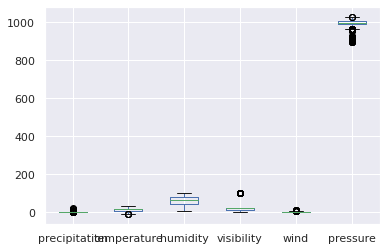

In [8]:
# Dataset charting
dataset.plot(kind='box', sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe5b416d50>,
      dtype=object)

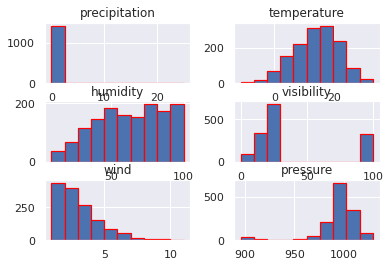

In [9]:
# Histograms
dataset.hist(edgecolor='red',linewidth=1.2)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe57732c50>,
      dtype=object)

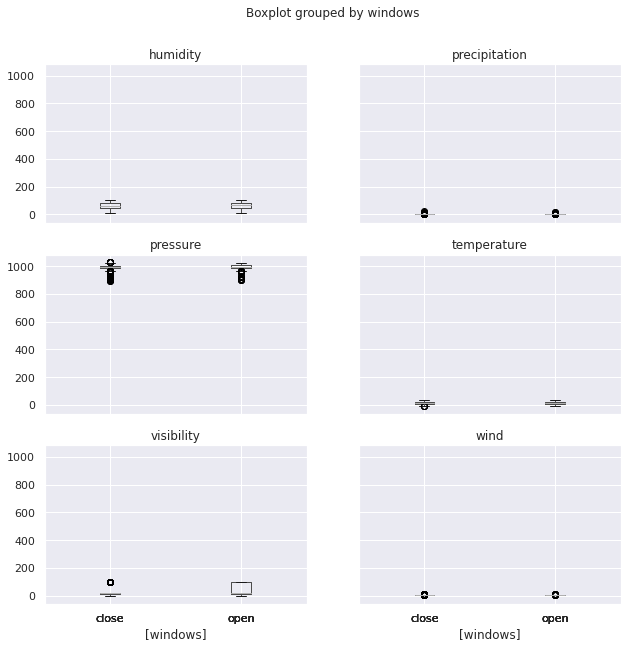

In [10]:
# Box chart per class
dataset.boxplot(by='windows',figsize=(10,10))


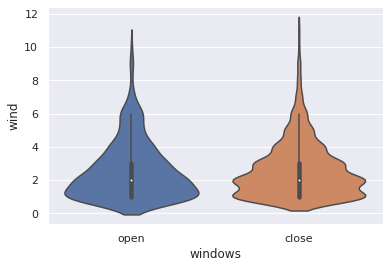

In [13]:
# Chart per label class
sns.violinplot(data=dataset,x='windows', y="wind")


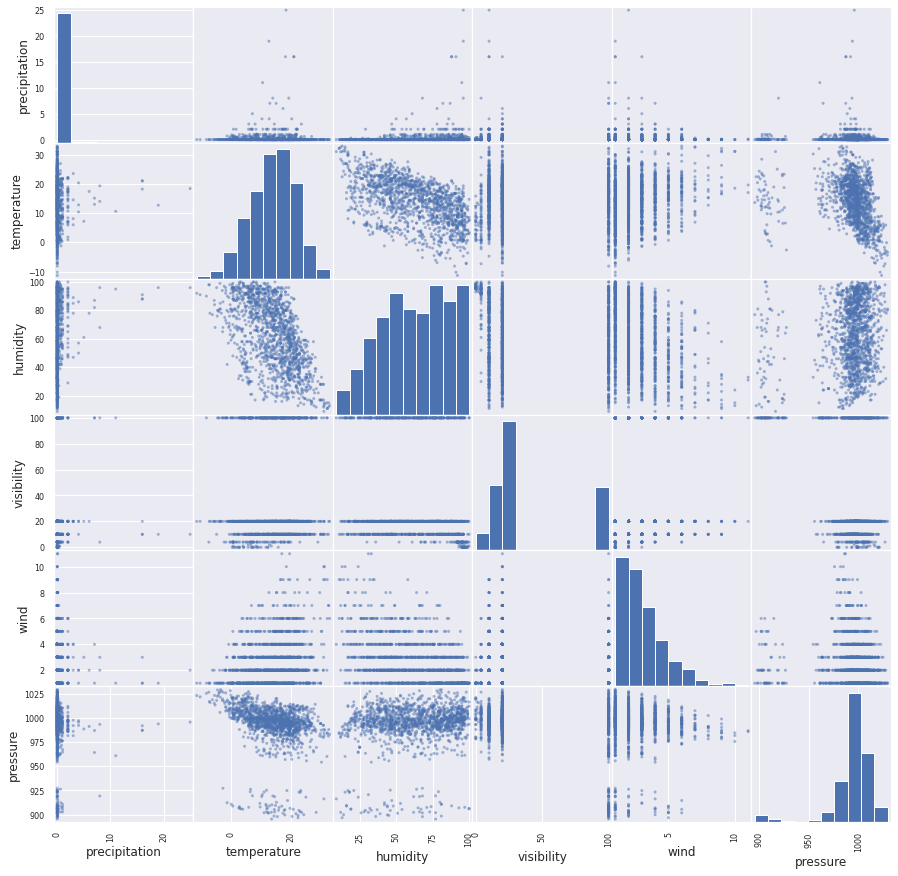

In [14]:
# Scatter matrix plot
from pandas.plotting import scatter_matrix
scatter_matrix(dataset,figsize=(15,15))
plt.show()

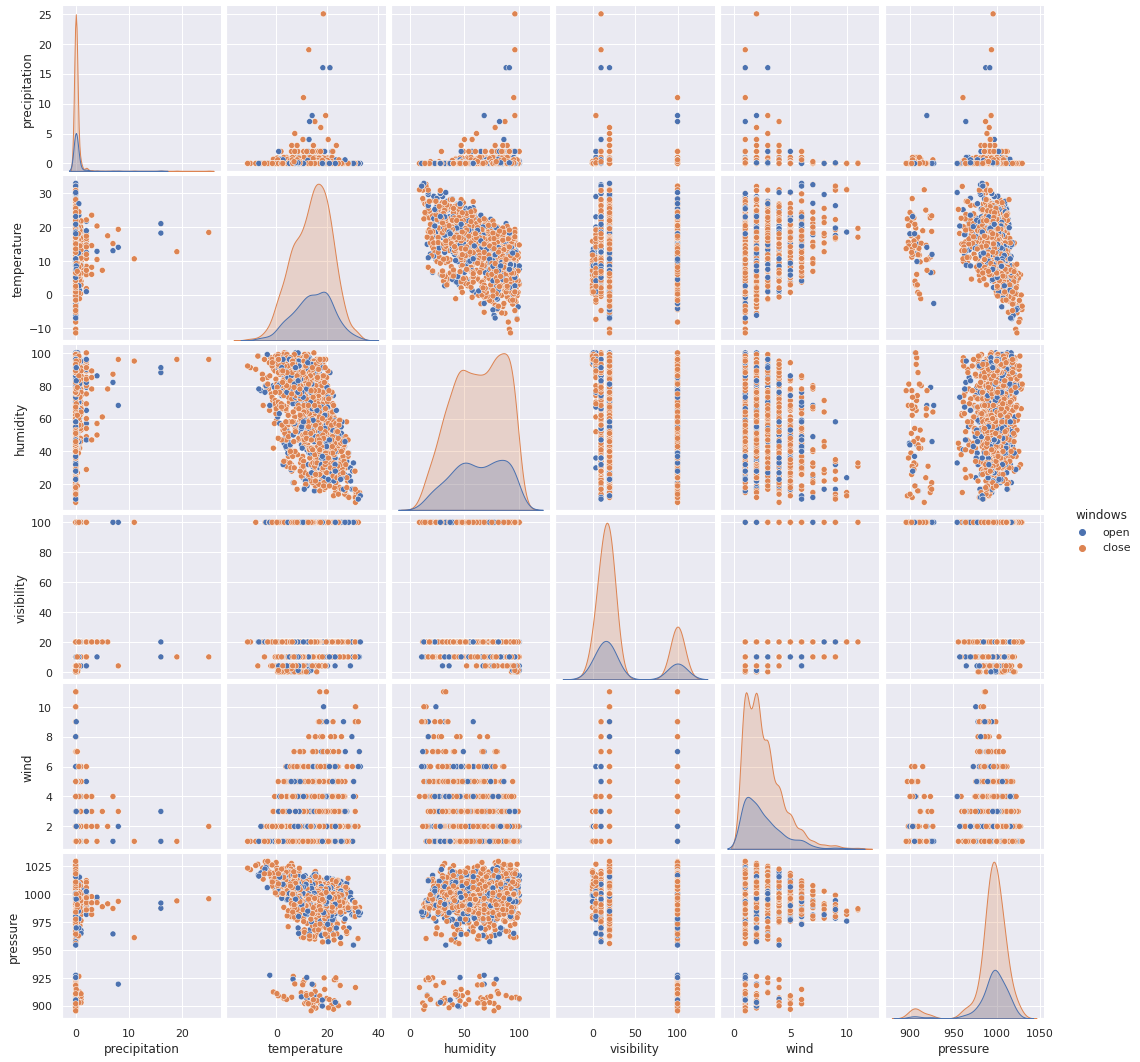

In [15]:
# Bivariety 
sns.pairplot(dataset, hue='windows')

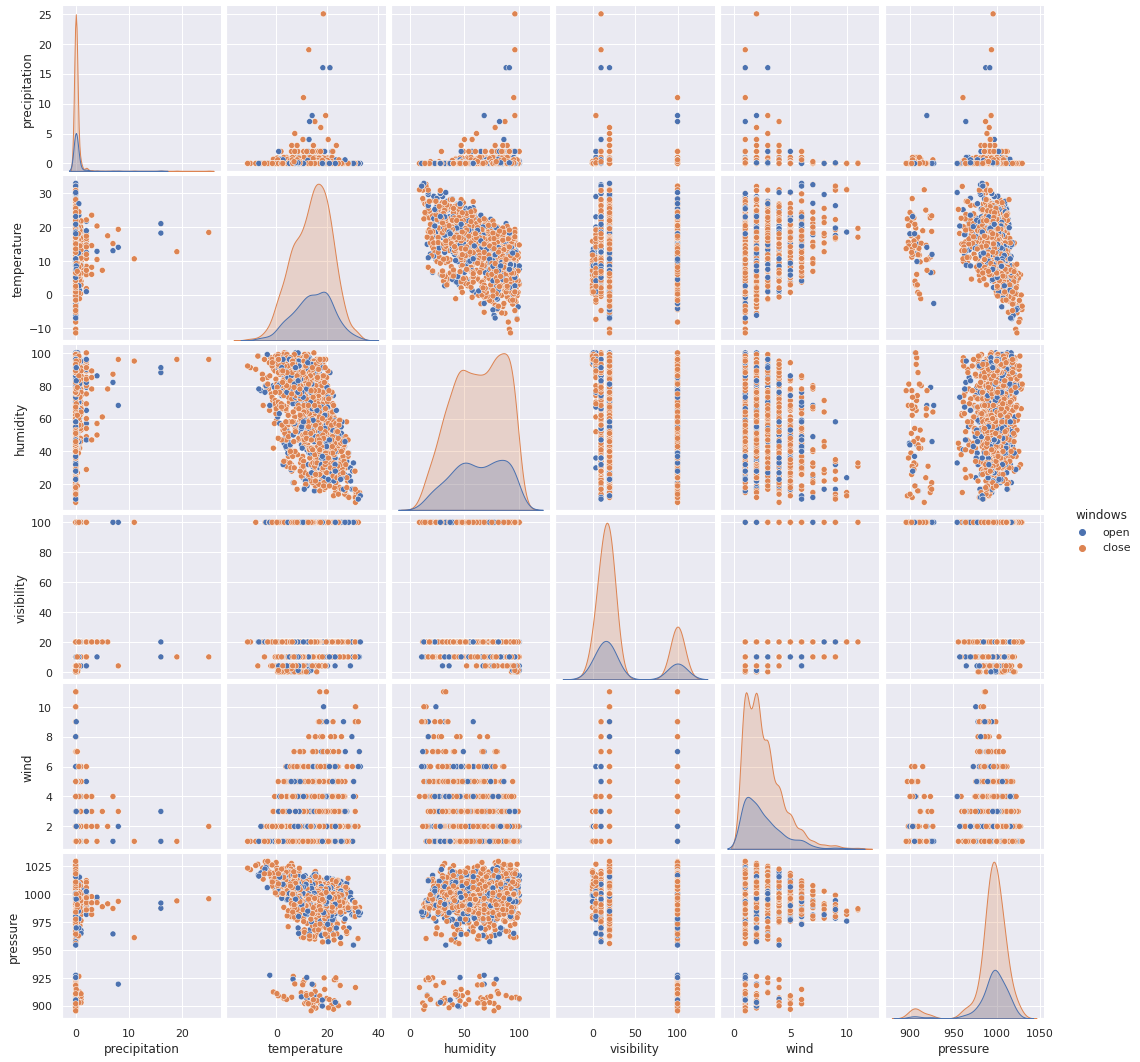

In [16]:
# Same as previous, updating to show as KDE
sns.pairplot(dataset,hue='windows', diag_kind='kde')

Applying different classification models:

In [17]:
# Importing metrics for assesment
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
# Separate the data into independent and dependent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

# divide the dataset in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
# Linear regression
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

# Classifier's prediction summary
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       close       0.77      1.00      0.87       223
        open       0.00      0.00      0.00        65

    accuracy                           0.77       288
   macro avg       0.39      0.50      0.44       288
weighted avg       0.60      0.77      0.68       288

[[223   0]
 [ 65   0]]
Accuracy:  0.7743055555555556


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# Naïve Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

# Classifier's prediction summary
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

# accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       close       0.78      0.99      0.87       223
        open       0.50      0.03      0.06        65

    accuracy                           0.77       288
   macro avg       0.64      0.51      0.46       288
weighted avg       0.72      0.77      0.69       288

[[221   2]
 [ 63   2]]
Accuracy:  0.7743055555555556


In [21]:
# Support vector machine
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import SVC

classifier=SVC()
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

# Classifier's prediction summary
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       close       0.77      1.00      0.87       223
        open       0.00      0.00      0.00        65

    accuracy                           0.77       288
   macro avg       0.39      0.50      0.44       288
weighted avg       0.60      0.77      0.68       288

[[223   0]
 [ 65   0]]
Accuracy:  0.7743055555555556


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# K-nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

# Classifier's prediction summary
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       close       0.78      0.95      0.85       223
        open       0.29      0.08      0.12        65

    accuracy                           0.75       288
   macro avg       0.54      0.51      0.49       288
weighted avg       0.67      0.75      0.69       288

[[211  12]
 [ 60   5]]
Accuracy:  0.75


In [23]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

# Classifier's prediction summary
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       close       0.78      0.70      0.73       223
        open       0.23      0.31      0.26        65

    accuracy                           0.61       288
   macro avg       0.50      0.50      0.50       288
weighted avg       0.65      0.61      0.63       288

[[155  68]
 [ 45  20]]
Accuracy:  0.6076388888888888
